In [2]:
import os.path
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
from pyofss import single_plot, map_plot, waterfall_plot, labels


Generating single_plot...


<Figure size 432x288 with 0 Axes>

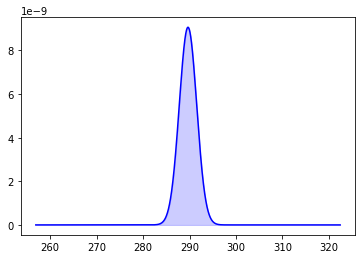

In [3]:
domain = Domain(samples_per_bit = 8192*4, bit_width = 500, total_bits = 1, centre_nu = lambda_to_nu(1035.0))
gaussian = Gaussian(name="initial_pulse", peak_power = 0.1, width = 0.1, C = 0, using_fwhm=True)
A = gaussian.generate(domain.t)
single_plot(domain.nu, spectral_power(A))

In [4]:
filter_1 = Filter(name="filter_1", width_nu=(Domain.vacuum_light_speed/(1040**2))*4, offset_nu=(lambda_to_nu(1040) - lambda_to_nu(1035)),
                 m=1, channel=0, using_fwhm=False, type_filt = "reflected")

In [5]:
sys = System( domain, A)
sys.add(filter_1)


Generating single_plot...


<Figure size 432x288 with 0 Axes>

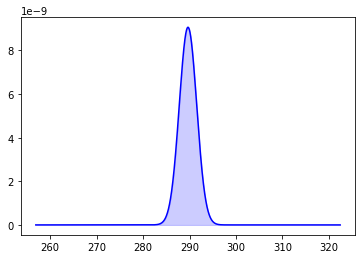

In [6]:
sys.field
single_plot(domain.nu, spectral_power(sys.field))

In [7]:
sys.add(Splitter(name="splitter", loss = 0.55))


Generating single_plot...


<Figure size 432x288 with 0 Axes>

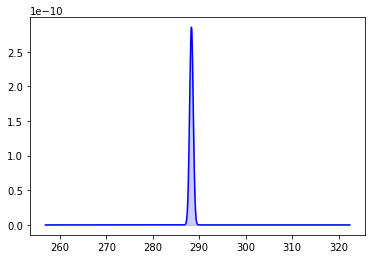

Using general expression for nonlinearity


In [101]:
sys.field
single_plot(domain.nu, spectral_power(sys.field))
sys.add(Fibre(length=0.8, gamma=0.0, beta=np.array([22.2, 63.8]), self_steepening=True, use_all='hollenbeck',
                 total_steps=100, traces=100, method='ss_symmetric', local_error=0.005, useAmplification = True))
sys.run()


In [70]:
sys.field
single_plot(domain.nu, spectral_power(sys.field))

1.1086999186390532